In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [39]:
data = pd.read_csv('/content/Social_Network_Ads.csv')

In [40]:
data


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [41]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [44]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [45]:
data.isnull().sum() #checking for missing values

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

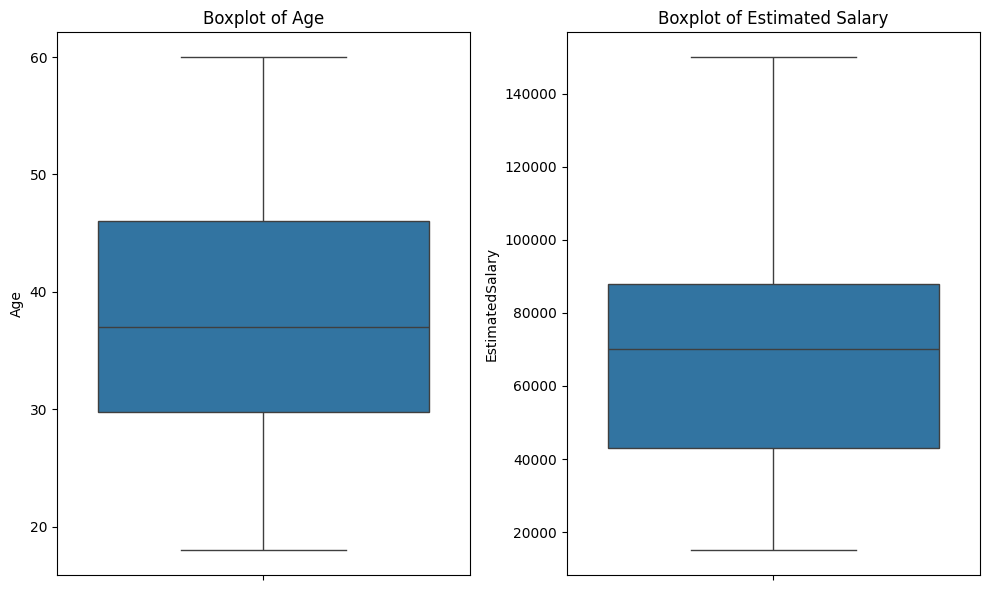

In [46]:

# Create box plots   to check for outliers
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=data['Age'])
plt.title('Boxplot of Age')

plt.subplot(1, 2, 2)
sns.boxplot(y=data['EstimatedSalary'])
plt.title('Boxplot of Estimated Salary')

plt.tight_layout()
plt.show()

In [47]:
data = pd.get_dummies(data, columns=['Gender'], drop_first=True)#one hot Encoding


In [48]:
data.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,True
1,15810944,35,20000,0,True
2,15668575,26,43000,0,False
3,15603246,27,57000,0,False
4,15804002,19,76000,0,True


In [49]:
from sklearn.preprocessing import StandardScaler #feature scaling

scaler = StandardScaler()
data[['Age', 'EstimatedSalary']] = scaler.fit_transform(data[['Age', 'EstimatedSalary']])


In [50]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,4.000000e+02,4.000000e+02,400.000000
mean,1.569154e+07,-7.105427e-17,-1.776357e-17,0.357500
std,7.165832e+04,1.001252e+00,1.001252e+00,0.479864
min,1.556669e+07,-1.877311e+00,-1.607506e+00,0.000000
25%,1.562676e+07,-7.550313e-01,-7.852897e-01,0.000000
50%,1.569434e+07,-6.256110e-02,7.561451e-03,0.000000
75%,1.575036e+07,7.970571e-01,5.361289e-01,1.000000
max,1.581524e+07,2.134241e+00,2.356750e+00,1.000000


In [51]:
from sklearn.model_selection import train_test_split       #splitting the data

X = data.drop('Purchased', axis=1)
y = data['Purchased']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [52]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [53]:
y_pred_rf = model.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.925
Precision: 0.8666666666666667
Recall: 0.9285714285714286
F1 Score: 0.896551724137931
Confusion Matrix:
 [[48  4]
 [ 2 26]]


In [55]:
import pickle
pickle.dump(model,open('model.pkl','wb'))

In [57]:
pickle_model=pickle.load(open('model.pkl','rb'))